# The Solow Model and Green Solow model

In 2004, Brock and Taylor introduced the Green Solow Model as an extension to the standard and well known Solow Model. The idea was to incorporate the costs of pollution associated with production into the production function itself. In this project, we aim to code the Green Solow Model and analyze it from various perspectives.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
import ipywidgets as widgets
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

First, we set up the original Solow model that was presented by Solow and Swan in 1956:

\begin{align}
    & Y_t = F(K_t,B_tL_t) = K_t^{\alpha}B_tL_t^{1-\alpha}, \quad 1>\alpha>0 \quad \quad (1) \\
    & \dot{K_t} = sY_t - \delta K_t \quad \quad (2) \\ 
    & \dot{L_t} = nL_t \Rightarrow L_t=L_0 e^{nt} \quad \quad (3) \\
    & \dot{B_t} = g_BB_t \Rightarrow B_t=B_0 e^{g_Bt}, \quad 1>g_B>0 \quad \quad (4) 
\end{align}

, where the variables are defined as:

* $K_t$ is capital
* $L_t$ is labor (growing with a constant rate of $n$)
* $A_t$ is technology (growing with a constant rate of $g$)
* $Y_t = F(K_t,A_tL_t)$ is GDP
* $B_t$ is labour augmenting technology (knowledge)

Equation (1) shows a standard Cobb-Douglas production function with constant returns to scale. Production at a given time depends on the stock of capital and effective labour. 
Equation (2) describes the evolution of capital as depending positively on savings and negatively on depreciation of capital. In the function, $s$ is the savings rate, and $\delta$ is the depreciation rate.
Equation (3) notes that the labour growth is equal to a parameter, $n$. The absolute growth in the labour force at a given time is equal to the percentage growth times the current labour force.
Equivalently, equation (4) shows that the absolute growth in labour augmenting technology is equal to the percentage growth in technology, $g_B$, times the current technology level.

Equation (2) implies that **saving** is a constant fraction of GDP

$$ S_t = sY_t,\,s\in(0,1) $$

such that **capital accumulates** according to

$$ K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1) $$

The **production function** has **constant-return to scale** such that

$$ \frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t}) $$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}] $$

We assume the **production function** is **Cobb-Douglas** so

$$ F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha} $$

# Steady state

First we would like to find the steady state. This can be done analytically, where you simply solve an equation using sympy. It can also be done numerically, where give an optimizer some starting values, and then it finds the inputs that give the optimal value.

## Analytical solution

when using sympy to find the steady state, we have to solve the following:

$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] $$

We can start out by defining the different values and defining the steady state equation:

In [34]:
#using sympy to define symbols
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

#Coding function to be solved
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))

Using the sympy package it is then possible to solve the equation.

In [35]:
#Solving function analytically
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

We now have an explicit expression of the steady state, which means that we can calculate it with different parameters. First, we need the solution to be a python function.

In [36]:
#transforming the function to a python function
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

Then we can define some parameters and have a look at the result

In [37]:
#Defining parameters
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

In [38]:
print(f'analytical solution is: {ss_func(s,g,n,alpha,delta)}')

analytical solution is: 1.903831539231319


In the steady state, capital per effektive worker equals 1.9 (with the selected parameter values).

## Numerical solution

In stead of finding the steady state analytically, one can also do it numerically. This is done by implementing the steady state function and then using an optimize function. First the function to solve can be rewritten in order to get a root-finding problem.

\\[ 0 = \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] - \tilde{k}^{\ast} \\]


We can then implement a function with the different variables as inputs and the steady state as output

In [39]:
def ss_solver(s,g,n,alpha,delta):

    
    #using lambda functions in order to find the define the objective function
    f = lambda k: k**alpha
    obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))

    #using the optimize root function to finde the steady state
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='bisect')
    
    return result




The numerical solution for the steady state is then

In [40]:
#defining the solution
solution = ss_solver(s,g,n,alpha,delta)


print(f' numerical solution is: {solution.root}')

 numerical solution is: 1.903831539231108


Luckily, this is the same result as the analytical one. Both methods are valid, but it is not always possible to find an analytical explicit solution. The numerical methods should be computable in almost any case. 

# Further analysis

Next we will take a look at some the results of the Solow model, both visually and interactively. We will also look at the Green Solow model as an extention of the regular Solow model.

## Visualizing the Solow model

Lets first take a look at how the saving rate affects the steady state. We will start out by creating a function with only the saving rate as input

In [41]:
def ss(s):
    return ss_solver(s,0.02,0.01,1/3,0.1).root

We can now plot the steady state for different values of saving rates.

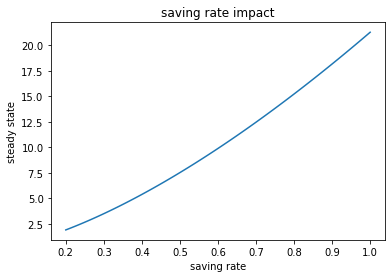

In [42]:
x=np.linspace(0.2,1,101) #creating vector
l_vec= []  #creating empty vector
  #creating empty vector 

#looping through different values
for i in x:
    l_vec.append(ss(i))  #filling in the numbers in the vector
    

#Plotting
plt.plot(x,l_vec)
plt.xlabel("saving rate")
plt.ylabel("steady state")
plt.title("saving rate impact")
plt.show()

The graph shows a positive and convex relationship between the savings rate and the steady state level of capital per effective worker. The savings rate
is assumes to be a constant share of income and has no effect on the amount of labour - thus it makes sense that the higher it is, the more capital will be 
accumulated over time.

Next we can take a look at how the technology growing rate affects the steady state

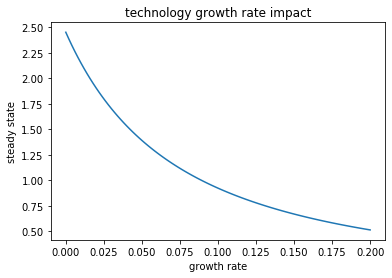

In [43]:

def gr(g):
    return ss_solver(0.2,g,0.01,1/3,0.1).root

x=np.linspace(0,0.2,101) #creating vector 
l_vec= []  #creating empty vector
  #creating empty vector 

#looping through different values
for i in x:
    l_vec.append(gr(i))  #filling in the numbers in the vector
    

#Plotting
plt.plot(x,l_vec)
plt.xlabel("growth rate")
plt.ylabel("steady state")
plt.title("technology growth rate impact")
plt.show()

Reversely, the technology growth rate has a negative effect on the steady state level of capital per effective worker. They key observation here is that the technology is labour augmenting - not capital augmenting. Thus, we can discuss the presence of opposing effect. The higher growth rate of technology should have a positive effect on output, which increases total savings and thus increases capital accumulation. However, since the technology is only increasing labour, this will grow more than capital, making the level of capital per worker smaller in steady state.

Another interesting thing to see is how the labor rate affects the steady state.

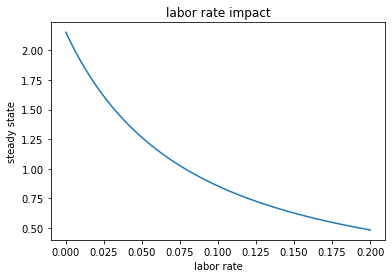

In [44]:
def labor(n):
    return ss_solver(0.2,0.02,n,1/3,0.1).root

x=np.linspace(0,0.2,101) #creating vector
l_vec= []  #creating empty vector
  #creating empty vector 

#looping through different values
for i in x:
    l_vec.append(labor(i))  #filling in the numbers in the vector
    

#Plotting
plt.plot(x,l_vec)
plt.xlabel("labor rate")
plt.ylabel("steady state")
plt.title("labor rate impact")
plt.show()

The graph shows that the steady state value of capital per effective worker depends negatively on the growth of labour supply. The explanation for this is equivalent to the one discussed about the growth rate of labour augmenting capital; when the labour force increases, output increases, but since the labour force increases relatively more, the level of capital per worker will decrease.

Lastly, we can create an interactive figure to show the affects of the parameters all together.

In [45]:
def interactive_figure(g,n,s):
    
    steadystate = ss_solver(s,g,n,1/3,0.1).root
    return steadystate
    

In [46]:

widgets.interact(interactive_figure,
    g=widgets.FloatSlider(description="$Technology growth rate$", min=0, max=0.2, step=0.001, value=2),
    n=widgets.FloatSlider(description="$Labor rate$", min=0, max=1, step=0.05, value=2),
    s=widgets.FloatSlider(description="$Saving rate$", min=0.2, max=1, step=0.05, value=2),
);

interactive(children=(FloatSlider(value=0.2, description='$Technology growth rate$', max=0.2, step=0.001), Flo…

The interactive figure confirms the conclusions that were illustrated above; the steady state level of capital per effective worker depends positive on the savings rate and negative on the labor growth rate and the technology growth rate.

## Solow extention - Green Solow Model

The extension to the Solow Model, called the Green Solow Model, introduces another equation in the model:

\begin{align}
E_t=\Omega Y_t-\Omega A(Y_t,R_t) \quad \quad (5) 
\end{align}

, where E is total emissions. Equation (5) shows that the total emissions is a function of the production and the amount of emissions that are abated. $\omega$ is the fraction of production that turns into an emission cost. There is a linear relationship between production and the amount of pollution from it.
The abatement function is assumed to be concavely increasing in output, $Y$, and effort to abate, $R$. Thus, the effect of abatement on the emissions is diminishing.

Abatement has a cost, and for this reason, output will be lower when including this equation in the model. We define output as:

\begin{align}
Y=Y_t-R_t=(1-\theta)Y_t \quad \quad (6) 
\end{align}

This can be rewritten to fully understand the effect on emissions in the model:

\begin{align}
    &E=\Omega (Y_t-A_t(Y_t,R_t)) \quad \quad (7) \\  
    &E=\Omega Y_t(1-A_t(1,\frac{R_t}{Y_t}) \quad \quad (8) \\  
    &E=\Omega Y_t \alpha(\theta_t), \quad \theta_t \equiv \frac{R_t}{Y_t} \quad \alpha(\theta_t) \equiv 1-A_t(1,\theta_t) \quad \quad (9) \\
\end{align}

The production function still has constant returns to scale. This implies that we can derive the model in output per effetive worker as:

\begin{align}
Y_t=K_t^\alpha (B_tL_t)^{1-\alpha} \Rightarrow y_t=k_t^\alpha \quad y_t\equiv \frac{Y_t}{B_tL_t},\quad k_t\equiv \frac{K_t}{B_tL_t} \quad \quad (10) 
\end{align}

Now, we are able to calculate the new transition equation for capital per effective worker. We get:  

\begin{align}
\dot{k_t}=s(1-\theta_t)k_t^\alpha-k_t(\delta+g_B+n) \quad \quad (11) 
\end{align}


Just as with the standard Solow Model, we can compute the steady state analytically or numerically. This time we will only do it analytically.

In [61]:
#defining paramters using sympy
theta_gs = sm.symbols('theta')
k_gs = sm.symbols('k')
alpha_gs = sm.symbols('alpha')
delta_gs = sm.symbols('delta')
s_gs = sm.symbols('s')
g_gs = sm.symbols('g')
n_gs = sm.symbols('n')

# Standard per effective capita production function
f=k_gs**alpha_gs

# transition equation 
tc=sm.Eq(0,(s_gs*(1-theta_gs)*k_gs**alpha_gs-(delta_gs+g_gs+n_gs)*k_gs))

# Solving the transition equation (tc) for k using sympy.
tcc=sm.solve(tc,k_gs)[0]
tcc

(s*(1 - theta)/(delta + g + n))**(-1/(alpha - 1))

After solving the function we can then calculate the steady state.

In [63]:
tc_func = sm.lambdify((s_gs,g_gs,n_gs,delta_gs,alpha_gs,theta_gs),tcc)

s_gs = 0.2
g_gs = 0.02
n_gs = 0.01
alpha_gs = 1/3
delta_gs = 0.1
theta_gs = 0.05

print(f'analytical solution is: {tc_func(s_gs,g_gs,n_gs,alpha_gs,delta_gs,theta_gs):.3f}')


analytical solution is: 0.487


The result implies that the introduction of emissions in the model have a negative effect on the steady state level of capital per worker. When applying the same parameter values as before, we get a much lower result for the steady state, since now the production entails a cost on the environment.

We now want to illustrate steady state in a transition plot. The plot shows how capital evolves over time and reaches steady state at the intersect between the two lines.

In [65]:
# Defining the investment per worker function
def invest_per_work2(k_gs, theta_gs,alpha_gs,s_gs):
    return (s_gs*(1-theta_gs)*k_gs**alpha_gs)

#calculating break  even inflation
def break_even(k_gs):
    return (delta_gs+g_gs+n_gs)*k_gs




# Defining the k values of the function
x_vec = np.linspace(0,50,50)


def transition_diagram2(theta_gs,alpha_gs,s_gs):
    
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k') # label x-axis
    investment=invest_per_work2(x_vec,theta_gs,alpha_gs,s_gs) # calculate the investments per worker using the function
    break_even_cap=break_even(x_vec) # calculate the break even equation for the x-values
    plt.title('Green solow transition diagram') #Title
    ax = fig.add_subplot(1,1,1) # Include many plots 
    ax.plot(break_even_cap, label='$(\delta+g_B+n)\cdot k$'); # plot and label
    ax.plot(investment, label='$s \cdot (1-\\theta)\cdot k^\\alpha $'); # plot and label
    ax.set_xlim([0,50]) # fixed x range
    ax.set_yticklabels([]) #remove y-labes
    plt.legend() # plot the labels in the legend
    

# Call diagram with widgets
widgets.interact(transition_diagram2,
    
    # widgets for all the inputs in the function transition_diagram2             
    theta_gs=widgets.FloatSlider(description="$\\theta$", min=0, max=1, step=0.01, value=0.05),
    alpha_gs=widgets.FloatSlider(description="$\\alpha$", min=0, max=1, step=0.01, value=0.25),
    s_gs=widgets.FloatSlider(description="$s$", min=0, max=1, step=0.01, value=0.25),
    
);

interactive(children=(FloatSlider(value=0.05, description='$\\theta$', max=1.0, step=0.01), FloatSlider(value=…

The intersection between the two curves illustrates the steady state of the model. The figure shows that if the entire income is spent on abating emissions, $\theta=1$, there will be no accumulation of capital and thus no income. Generally speaking, a lower abatement is less costly and thus leads to a higher steady state level of capital per effective worker. However, if the level of abatement is in fact too low, then it can cause damage to the economy that can't be reversed. We can add that a higher savings rate still leads to a higher steady state level of capital per worker, as per the same reasons as in the standard Solow Model.

Lastly we can again se how the saving rate, the abatement, the labor rate and the growth rate of technology affects the steady state.

In [66]:
#Defining figure function which depend on the values we want to look at
def interactive_figure(g,n,s,theta):
    
    steadystate = tc_func(s,g,n,1/3,0.1,theta)
    return steadystate
    

In [68]:
#Using widgets to make interactive results
widgets.interact(interactive_figure,
    g=widgets.FloatSlider(description="$Technology growth rate$", min=0, max=0.2, step=0.001, value=2),
    n=widgets.FloatSlider(description="$Labor rate$", min=0, max=1, step=0.05, value=2),
    s=widgets.FloatSlider(description="$Saving rate$", min=0.2, max=1, step=0.05, value=2),
    theta=widgets.FloatSlider(description="$Abatement rate$", min=0, max=1, step=0.05, value=2),
);

interactive(children=(FloatSlider(value=0.2, description='$Technology growth rate$', max=0.2, step=0.001), Flo…

The interactive figure above confirms that when the abatement rate is set to 1, then there will be no capital accumulation and thus no income. Generally, the same relationships are present; technology and labour decreases the steady state level of capital per effective worker, while the savings rate increases it.

# Conclusion

In this project we have examined the properties and results of a standard Solow Model. We have then introduced an additional equation to the model, including emissions as a cost of production. This model is called the Green Solow Model, and it provides a framework for analyzing economic growth while accounting for the toll it takes on the environment. While the results of the two models are similar, the Green Solow Model shows that abatement of emissions is costly but needed to some extent, if we are to avoid irreversable damage to the economy.